# Capstone Project 2: EDA - Inferential Statistics

**In the following EDA, I try to perfom analyze correlation between variable of concavity_worst and concave point_worst.** 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

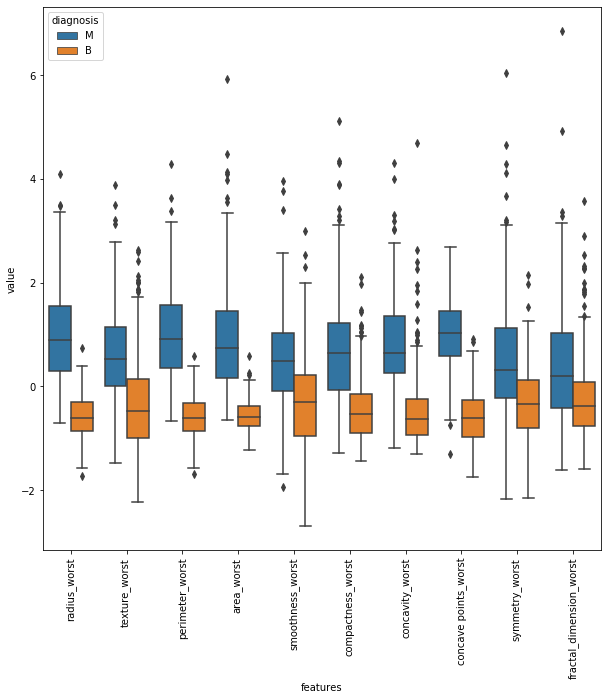

In [2]:
data = pd.read_csv('Data/data.csv')
source = data.drop(['id','Unnamed: 32','diagnosis'],axis=1)
target = data.diagnosis
source_s = (source - source.mean()) / (source.std()) 
data = pd.concat([target,source_s.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

**variable of concavity_worst and concave point_worst looks like similar**

# **Initial observations for Correlation between variable of concavity_worst and concave point_worst**

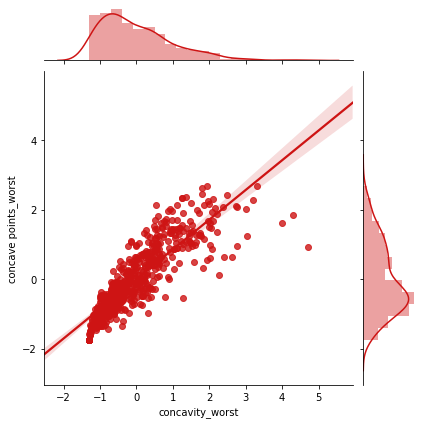

In [6]:
sns.jointplot(source_s.loc[:,'concavity_worst'], source_s.loc[:,'concave points_worst'], kind="regg", color="#ce1414")

In [7]:
# Compute the covariance matrix: covariance_matrix

covariance_matrix = np.cov(source_s.loc[:,'concavity_worst'],source_s.loc[:,'concave points_worst'])
# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = (covariance_matrix[0,1],covariance_matrix[1,0])

# Print the length/width covariance
print(petal_cov)

[[1.         0.85543386]
 [0.85543386 1.        ]]
(0.8554338603439988, 0.8554338603439988)


In [8]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    
    corr_mat= np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [9]:
r = pearson_r(source_s.loc[:,'concavity_worst'],source_s.loc[:,'concave points_worst'])
# Print the result
print(r)

0.8554338603439994


**Pearson correlation coefficient is 0.86, is looks enough to say that they are correlated**

# Setup hypothesis test
 
 **Ho : The variable of concavity_worst and concave point_worst are independent**

 **Ha : The variable of concavity_worst and concave point_worst are correlated**
 
 **Statistical significance for  𝛼  = 0.01**
 
  **Test Statistic: Pearson correlation coefficient**

**Permutation Test on Data**

<p>To do so, permute the concavity_worst but leave the concave point_worst values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.</p>

In [10]:
x = source_s.loc[:,'concavity_worst']
y = source_s.loc[:,'concave points_worst']
# Compute observed correlation: r_obs
r_obs = pearson_r(x,y)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    number_discharged_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(number_discharged_permuted,y)

# Compute p-value: p
p = np.sum(np.abs(perm_replicates)>=np.abs(r_obs))/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [11]:
alpha = 0.01
if p < alpha:
    print('p-value is less than 0.01.')
else:
    print('p-value is equal or more than than 0.01.')

p-value is less than 0.01.


**As p-value less than $\alpha$, we can reject the null hypothesis and accept alternative hypothesis which means that there is a correlation between variable of concavity_worst and concave point_worst.**

**Use statistic method from Scipy.stats**

In [12]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(x, y)
correlation, p_value 

(0.8554338603439992, 3.764097729696229e-164)

**p-value is statistically significant and reject the null hypothesis**